In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("../Datasets/carros_usados_exercicio.csv")
df.head()

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,45035,Passat,2019,15695,Manual,13061,Diesel,145.0,55.4,2.0,vw
1,61800,Superb,2018,18798,Semi-Auto,6241,Petrol,145.0,36.7,1.5,skoda
2,69017,Santa Fe,2016,17690,Semi-Auto,48155,Diesel,235.0,42.2,2.2,Hyundai
3,20159,3 Series,2016,18599,Automatic,30333,Hybrid,0.0,134.5,2.0,BMW
4,1306,A5,2016,15995,Manual,54000,Diesel,145.0,54.3,2.0,audi


In [3]:
df.describe()

,Unnamed: 0,year,price,mileage,tax,mpg,engineSize
count,67435.000000,67435.000000,67435.000000,67435.000000,67435.000000,67435.000000,67435.000000
mean,36245.761860,2017.075109,16590.036569,23159.984993,116.987766,55.822023,1.635966
std,20917.803003,2.102874,9322.058157,21351.731893,64.117427,17.216670,0.562606
min,0.000000,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,18129.500000,2016.000000,10189.500000,7197.500000,30.000000,47.900000,1.200000
50%,36254.000000,2017.000000,14495.000000,17478.000000,145.000000,55.400000,1.600000
75%,54371.500000,2019.000000,20389.000000,32452.000000,145.000000,62.800000,2.000000
max,72434.000000,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


In [4]:
df.describe(exclude=np.number)

,model,transmission,fuelType,Make
count,67435,67435,67435,67435
unique,146,4,5,7
top,Fiesta,Manual,Petrol,Ford
freq,6108,40045,37612,16716


In [5]:
df.dtypes

Unnamed: 0        int64
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
Make             object
dtype: object

In [6]:
df.isna().sum()

Unnamed: 0      0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [7]:
df.isnull().sum()

Unnamed: 0      0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

# Tratamento do atributo unnamed

In [8]:
df.columns

Index(['Unnamed: 0', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'Make'],
      dtype='object')

In [9]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,Passat,2019,15695,Manual,13061,Diesel,145.0,55.4,2.0,vw
1,Superb,2018,18798,Semi-Auto,6241,Petrol,145.0,36.7,1.5,skoda
2,Santa Fe,2016,17690,Semi-Auto,48155,Diesel,235.0,42.2,2.2,Hyundai
3,3 Series,2016,18599,Automatic,30333,Hybrid,0.0,134.5,2.0,BMW
4,A5,2016,15995,Manual,54000,Diesel,145.0,54.3,2.0,audi


# Tratamento do atributo model

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df['model']=enc.fit_transform(df[['model']])
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,81.0,2019,15695,Manual,13061,Diesel,145.0,55.4,2.0,vw
1,113.0,2018,18798,Semi-Auto,6241,Petrol,145.0,36.7,1.5,skoda
2,107.0,2016,17690,Semi-Auto,48155,Diesel,235.0,42.2,2.2,Hyundai
3,2.0,2016,18599,Automatic,30333,Hybrid,0.0,134.5,2.0,BMW
4,12.0,2016,15995,Manual,54000,Diesel,145.0,54.3,2.0,audi


# Tratamento do atributo year

In [11]:
atributo='year'

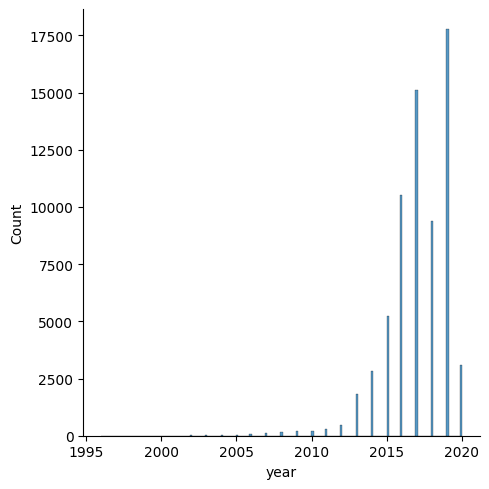

In [12]:
sns.displot(df[atributo].dropna())

# Tratamento do atributo transmission

In [13]:
atributo='transmission'

In [14]:
df.groupby(atributo).sum()

,model,year,price,mileage,fuelType,tax,mpg,engineSize,Make
transmission,,,,,,,,,
Automatic,771839.0,26440905,280296690,306412632,HybridHybridPetrolOtherPetrolPetrolHybridHybri...,1707945.0,735111.9,25752.6,BMWtoyotaFordvwBMWskodatoyotatoyotatoyotavwvwt...
Manual,2328120.0,80763053,502396515,1003282907,DieselDieselPetrolPetrolPetrolDieselPetrolDies...,4213440.0,2315082.5,56424.2,vwaudiFordBMWFordFordFordHyundaiFordFordskodaH...
Other,435.0,8068,58284,73927,HybridPetrolHybridPetrol,290.0,243.4,5.7,HyundaiHyundaitoyotaskoda
Semi-Auto,848804.0,28809434,335997627,252024122,PetrolDieselPetrolPetrolDieselDieselPetrolPetr...,1967395.0,713920.3,28138.9,skodaHyundaivwaudivwBMWskodaBMWaudiBMWaudiBMWv...


In [15]:
posicao_desejada = df.columns.get_loc(atributo)
posicao_desejada

3

In [16]:
mapa_transmission = { 'Automatic':1, 'Semi-Auto':2,'Manual':3,'Other':4}
df['transmission_encoded'] = df[atributo].map(mapa_transmission)

nome_coluna = 'transmission_encoded'
coluna = df.pop(nome_coluna)
df.insert(posicao_desejada, nome_coluna, coluna)
df=df.drop([atributo],axis=1)
df

,model,year,price,transmission_encoded,mileage,fuelType,tax,mpg,engineSize,Make
0,81.0,2019,15695,3,13061,Diesel,145.0,55.4,2.0,vw
1,113.0,2018,18798,2,6241,Petrol,145.0,36.7,1.5,skoda
2,107.0,2016,17690,2,48155,Diesel,235.0,42.2,2.2,Hyundai
3,2.0,2016,18599,1,30333,Hybrid,0.0,134.5,2.0,BMW
4,12.0,2016,15995,3,54000,Diesel,145.0,54.3,2.0,audi
...,...,...,...,...,...,...,...,...,...,...
67430,41.0,2017,8495,3,26422,Petrol,145.0,60.1,1.2,skoda
67431,126.0,2019,20990,3,100,Petrol,145.0,35.3,1.6,Hyundai
67432,1.0,2016,12998,3,20565,Diesel,0.0,74.3,1.5,BMW
67433,2.0,2019,26495,2,10922,Petrol,145.0,41.5,2.0,BMW


# Tratamento do atributo fuelType

In [17]:
atributo='fuelType'
posicao_desejada = df.columns.get_loc(atributo);posicao_desejada

5

In [18]:
df.groupby(atributo).sum()

,model,year,price,transmission_encoded,mileage,tax,mpg,engineSize,Make
fuelType,,,,,,,,,
Diesel,1605105.0,54226969,507725832,61082,796924504,3076125.0,1543385.6,53740.7,vwHyundaiaudiFordHyundaivwFordHyundaiBMWBMWaud...
Electric,442.0,8065,69473,4,64238,135.0,1076.2,4.0,BMWFordBMWFord
Hybrid,181199.0,5462523,51733503,3019,61439038,199345.0,235734.1,4744.2,BMWtoyotatoyotatoyotatoyotatoyotatoyotatoyotaB...
Other,14116.0,451906,3879288,287,4591243,23815.0,18778.3,334.9,vwBMWtoyotaskodaBMWtoyotatoyotatoyotavwskodavw...
Petrol,2148336.0,75871997,555341020,97423,698774565,4589650.0,1965383.9,51497.6,skodavwFordBMWFordaudiFordFordskodaaudiFordtoy...


In [19]:
mapa_fuelType = { 'Petrol':1,'Diesel':2,'Hybrid':3,'Electric':4,'Other':5}
df['fuelType_encoded'] = df[atributo].map(mapa_fuelType)

nome_coluna = 'fuelType_encoded'
coluna = df.pop(nome_coluna)
df.insert(posicao_desejada, nome_coluna, coluna)
df=df.drop([atributo],axis=1)
df

,model,year,price,transmission_encoded,mileage,fuelType_encoded,tax,mpg,engineSize,Make
0,81.0,2019,15695,3,13061,2,145.0,55.4,2.0,vw
1,113.0,2018,18798,2,6241,1,145.0,36.7,1.5,skoda
2,107.0,2016,17690,2,48155,2,235.0,42.2,2.2,Hyundai
3,2.0,2016,18599,1,30333,3,0.0,134.5,2.0,BMW
4,12.0,2016,15995,3,54000,2,145.0,54.3,2.0,audi
...,...,...,...,...,...,...,...,...,...,...
67430,41.0,2017,8495,3,26422,1,145.0,60.1,1.2,skoda
67431,126.0,2019,20990,3,100,1,145.0,35.3,1.6,Hyundai
67432,1.0,2016,12998,3,20565,2,0.0,74.3,1.5,BMW
67433,2.0,2019,26495,2,10922,1,145.0,41.5,2.0,BMW


# Tratamento do atributo Make

In [20]:
atributo='Make'
posicao_desejada = df.columns.get_loc(atributo);posicao_desejada

9

In [21]:
df.groupby(atributo).sum()

,model,year,price,transmission_encoded,mileage,fuelType_encoded,tax,mpg,engineSize
Make,,,,,,,,,
BMW,356428.0,20146525,227099731,18983,254735776,17173,1316280.0,563481.1,21655.1
Ford,808918.0,33713935,205292078,46594,389521275,22108,1891225.0,967682.5,22565.7
Hyundai,355432.0,9145579,57821650,11848,97315406,6687,549030.0,243930.1,6614.8
audi,410391.0,20062074,228109901,21429,247635319,15208,1255925.0,504783.9,19230.8
skoda,445757.0,11858873,83864448,14236,118175582,7877,690195.0,332312.3,8423.2
toyota,438292.0,12630937,78600189,13596,142960162,10948,593775.0,394382.6,9233.5
vw,1133980.0,28463537,237961119,35129,311450068,20645,1592640.0,757785.6,22598.3


In [22]:
mapa_Make = { 'BMW':1,'Ford':2,'Hyundai':3,'audi':4,'skoda':5,'toyota':6,'vw':7 }
df['Make_encoded'] = df[atributo].map(mapa_Make)

nome_coluna = 'Make_encoded'
coluna = df.pop(nome_coluna)
df.insert(posicao_desejada, nome_coluna, coluna)
df=df.drop([atributo],axis=1)
df

,model,year,price,transmission_encoded,mileage,fuelType_encoded,tax,mpg,engineSize,Make_encoded
0,81.0,2019,15695,3,13061,2,145.0,55.4,2.0,7
1,113.0,2018,18798,2,6241,1,145.0,36.7,1.5,5
2,107.0,2016,17690,2,48155,2,235.0,42.2,2.2,3
3,2.0,2016,18599,1,30333,3,0.0,134.5,2.0,1
4,12.0,2016,15995,3,54000,2,145.0,54.3,2.0,4
...,...,...,...,...,...,...,...,...,...,...
67430,41.0,2017,8495,3,26422,1,145.0,60.1,1.2,5
67431,126.0,2019,20990,3,100,1,145.0,35.3,1.6,3
67432,1.0,2016,12998,3,20565,2,0.0,74.3,1.5,1
67433,2.0,2019,26495,2,10922,1,145.0,41.5,2.0,1


# Determinar valor do carro baseado nos dados do veiculo

In [23]:
X=df.drop(['price'],axis=1)
y=df['price']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=24)

## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

lr =LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
lr_pred= lr.predict(X_test)

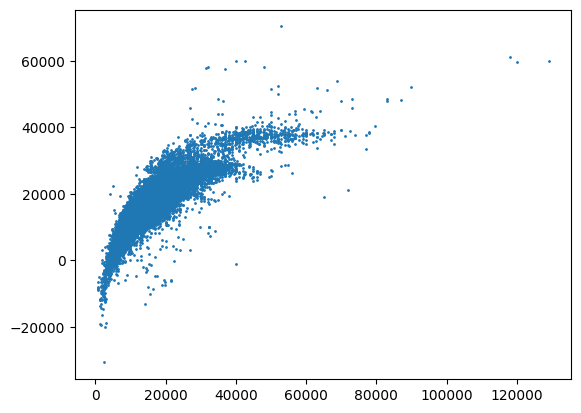

In [28]:
plt.scatter(y_test, lr_pred, s=1)

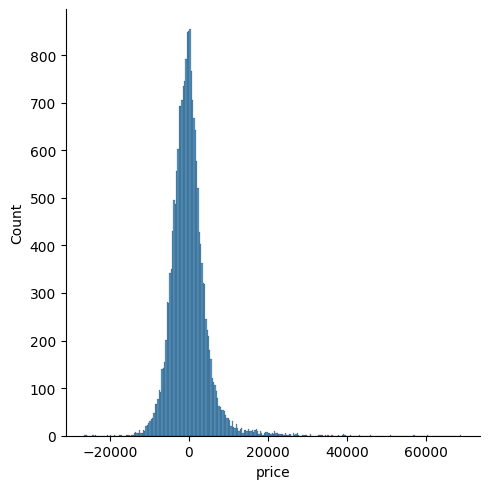

In [29]:
sns.displot((y_test-lr_pred))

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse

In [31]:
print("R2: ", r2_score(y_test, lr_pred))
print("MAE: ", mae(y_test, lr_pred))
print("MSE: ", mse(y_test, lr_pred))
print("RMSE: ", np.sqrt(mse(y_test, lr_pred)))

R2:  0.7419289555050896
MAE:  3171.955727468773
MSE:  21507074.49304024
RMSE:  4637.572047207487


In [32]:
def evaluate(reais, previstos):
    _mae = mae(reais, previstos)
    _mse = mse(reais, previstos)
    _rmse = np.sqrt(_mse)  # Calculate RMSE from MSE
    _r2 = r2_score(reais, previstos)
    return round(_mae, 2), round(_mse, 2), round(_rmse, 2), round(_r2, 2)

def print_evaluate(model, reais, previstos):
    mae, mse, rmse, r2 = evaluate(reais,previstos)
    print("------------------------------------------")
    print("MAE:", mae)
    print("RMSE:", rmse)
    print("R2 score:", r2)
    print("------------------------------------------")
    
    results=np.array([model,mae,mse,rmse,r2])
    results_df.loc[len(results_df)+1]= results

results_df = pd.DataFrame(columns=['Model', 'MAE','MSE','RMSE','R2'])

In [33]:
from time import time
from sklearn.model_selection import GridSearchCV

def grid_search(model, params):
    GSCV = GridSearchCV(estimator=model,
                        param_grid=params,
                        cv=5,
                        n_jobs=6,
                        verbose=2,
                        pre_dispatch=4
                       ) 
    start=time()
    GSCV.fit(X_train,y_train)
    grid_time=time()-start
    print("Grid time: ", grid_time)
    print(GSCV.best_params_)
    return GSCV.best_params_

In [34]:
#registar valores de RL
print_evaluate("Linear Regression", y_test,lr_pred)

------------------------------------------
MAE: 3171.96
RMSE: 4637.57
R2 score: 0.74
------------------------------------------


# Random Forest

In [35]:
from sklearn.ensemble import  RandomForestRegressor

In [36]:
rf_reg= RandomForestRegressor(random_state=24)

rf_reg.fit(X_train, y_train)

rf_pred = rf_reg.predict(X_test)

In [37]:
print("Random Forest Regressor:")
print_evaluate("Linear Regression", y_test,rf_pred)

Random Forest Regressor:
------------------------------------------
MAE: 1152.94
RMSE: 1838.14
R2 score: 0.96
------------------------------------------


In [38]:
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 24,
 'verbose': 0,
 'warm_start': False}

# Random Forest Otimizada

In [39]:
model = RandomForestRegressor(random_state=24)
params ={
    'n_estimators':[100,200,500,1000],
    'max_features':[1.0,'sqrt','log2',None],
    'max_depth':[None, 5,10],
    'criterion':['squared_error', 'poisson'],
}

best_params = grid_search(model, params)
best_params

Fitting 5 folds for each of 96 candidates, totalling 480 fits


KeyboardInterrupt: 

In [ ]:
#create a new RF
rf_reg_2 = RandomForestRegressor(random_state=24,
                                n_estimators=best_params['n_estimators'],
                                max_features=best_params['max_features'],
                                max_depth=best_params['max_depth'],
                                criterion=best_params['criterion'])
rf_reg_2.fit(X_train,y_train)
rf_pred_2 = rf_reg_2.predict(X_test)
print("Random Forest Regressor:")
print_evaluate("Linear Regression", y_test,rf_pred_2)